# NAFNet on Image Denoising (Modified from NAF Demo)

## Git clone [NAFNet](https://github.com/megvii-research/NAFNet) repo

In [1]:
!git clone https://github.com/megvii-research/NAFNet
%cd NAFNet
%pwd

c:\Users\User\Documents\GitHub\NYCU-Digital-Image-Process\NAFNet


fatal: destination path 'NAFNet' already exists and is not an empty directory.


'c:\\Users\\User\\Documents\\GitHub\\NYCU-Digital-Image-Process\\NAFNet'

## Set up the enviroment

### Your python must be **python 3.9.5**

### install pytorch 1.11.0 & cuda 11.3 
* You may need to change the cmd line below to the new line from the [link](https://pytorch.org/get-started/locally/) depeding on **your os**.
* I recommend you to run the installation cmd in your terminal rather than in jupyter notebook.

In [ ]:
!conda install pytorch==1.11.0 torchvision==0.12.0 torchaudio==0.11.0 cudatoolkit=11.3 -c pytorch

### install matplotlib 

In [ ]:
!pip install matplotlib

### install other requirements for the cloned repo 

In [2]:
!pip install -r requirements.txt
!pip install --upgrade --no-cache-dir gdown
!python3 setup.py develop --no_cuda_ext

## Download pretrained models

In [ ]:
import gdown
## download NAFNet-SIDD-width64.pth
gdown.download('https://drive.google.com/uc?id=14Fht1QQJ2gMlk4N1ERCRuElg8JfjrWWR', "./experiments/pretrained_models/", quiet=False)

# Download example images

In [9]:
import os
demo_input_folder = 'demo_input/'
demo_output_folder = 'demo_output/'

if not os.path.exists(demo_input_folder):
    os.makedirs(demo_input_folder)
if not os.path.exists(demo_output_folder):
    os.makedirs(demo_output_folder)

In [ ]:
import gdown

gdown.download('https://drive.google.com/uc?id=1uKwZUgeGfBYLlPKllSuzgGUItlzb40hm', demo_input_folder, quiet=False)
gdown.download('https://drive.google.com/uc?id=1ov6UqpIA6GjjJT5SdGeUAJECxka14nGf', demo_output_folder, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1uKwZUgeGfBYLlPKllSuzgGUItlzb40hm
To: c:\Users\User\Documents\GitHub\NYCU-Digital-Image-Process\NAFNet\noisy-demo-0.png
100%|██████████| 171k/171k [00:00<00:00, 6.83MB/s]


'noisy-demo-0.png'

## Preparation

In [3]:
import torch

from basicsr.models import create_model
from basicsr.utils import img2tensor as _img2tensor, tensor2img, imwrite
from basicsr.utils.options import parse
import numpy as np
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img
def img2tensor(img, bgr2rgb=False, float32=True):
    img = img.astype(np.float32) / 255.
    return _img2tensor(img, bgr2rgb=bgr2rgb, float32=float32)

def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('NAFNet output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)

def single_image_inference(model, img, save_path):
      model.feed_data(data={'lq': img.unsqueeze(dim=0)})

      if model.opt['val'].get('grids', False):
          model.grids()

      model.test()

      if model.opt['val'].get('grids', False):
          model.grids_inverse()

      visuals = model.get_current_visuals()
      sr_img = tensor2img([visuals['result']])
      imwrite(sr_img, save_path)


c:\Users\User\anaconda3\envs\dip_final\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Create Model

In [4]:
opt_path = 'options/test/SIDD/NAFNet-width64.yml'
opt = parse(opt_path, is_train=False)
opt['dist'] = False
NAFNet = create_model(opt)

 load net keys <built-in method keys of collections.OrderedDict object at 0x000001B02F6EEEC0>


2025-06-10 16:30:37,100 INFO: Model [ImageRestorationModel] is created.


# Inference and Show results

### demo images 

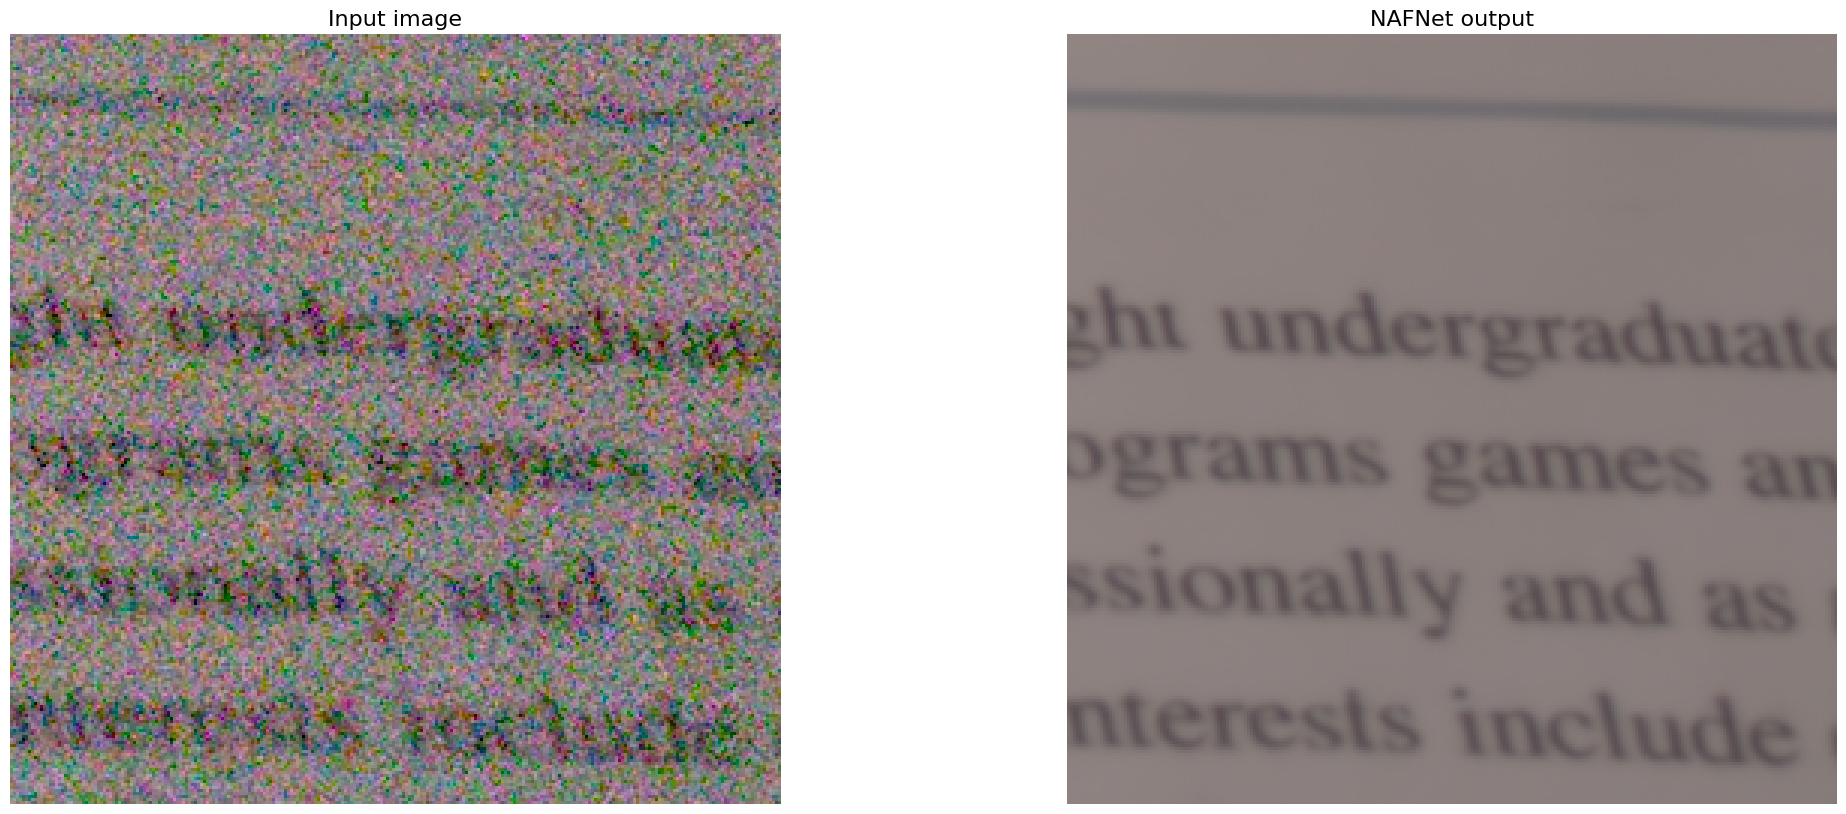

In [12]:
input_path = 'demo_input/noisy-demo-0.png'
output_path = 'demo_output/noisy-demo-0.png'

img_input = imread(input_path)
inp = img2tensor(img_input)
single_image_inference(NAFNet, inp, output_path)
img_output = imread(output_path)
display(img_input, img_output)

### self uploaded images 

In [5]:
import os
output_folder = '../output_images'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

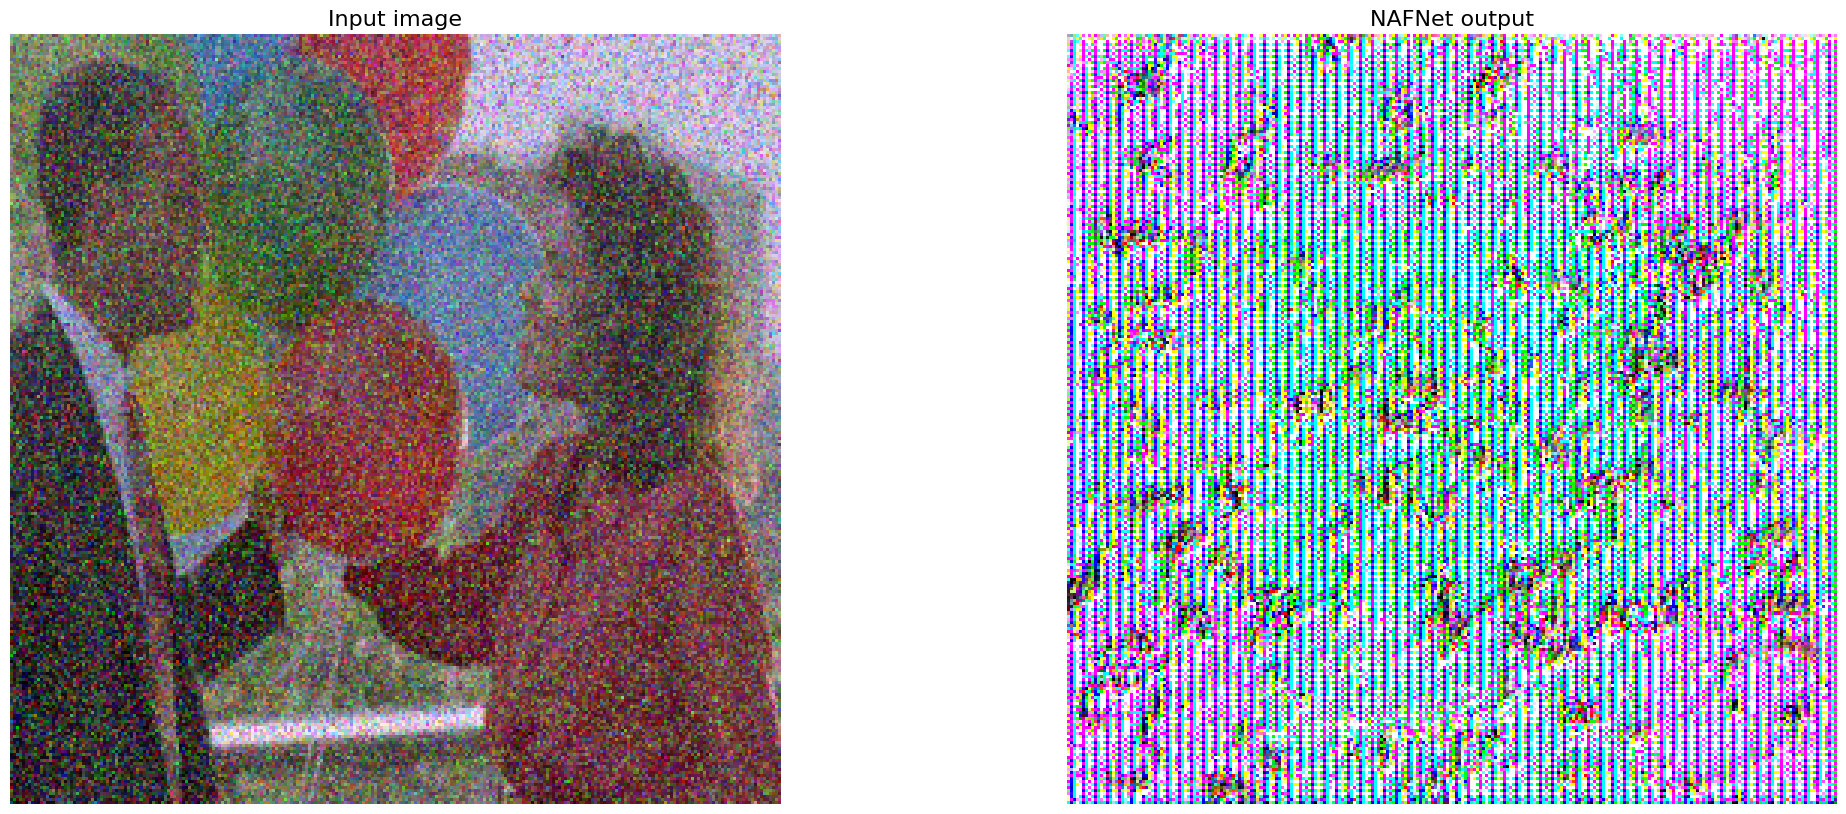

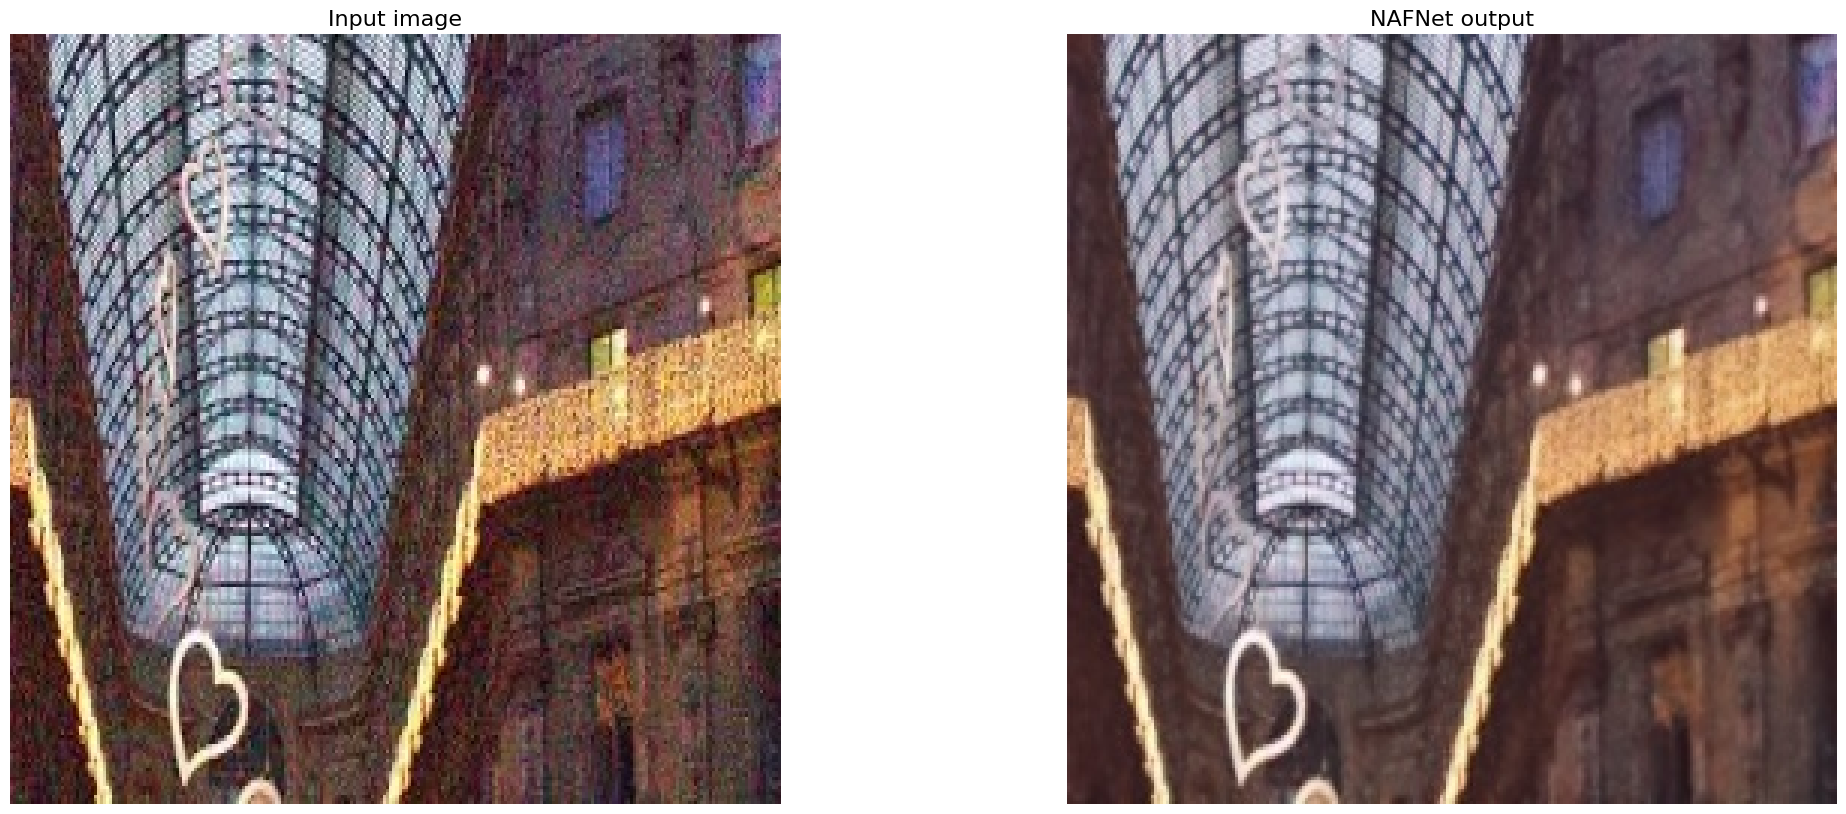

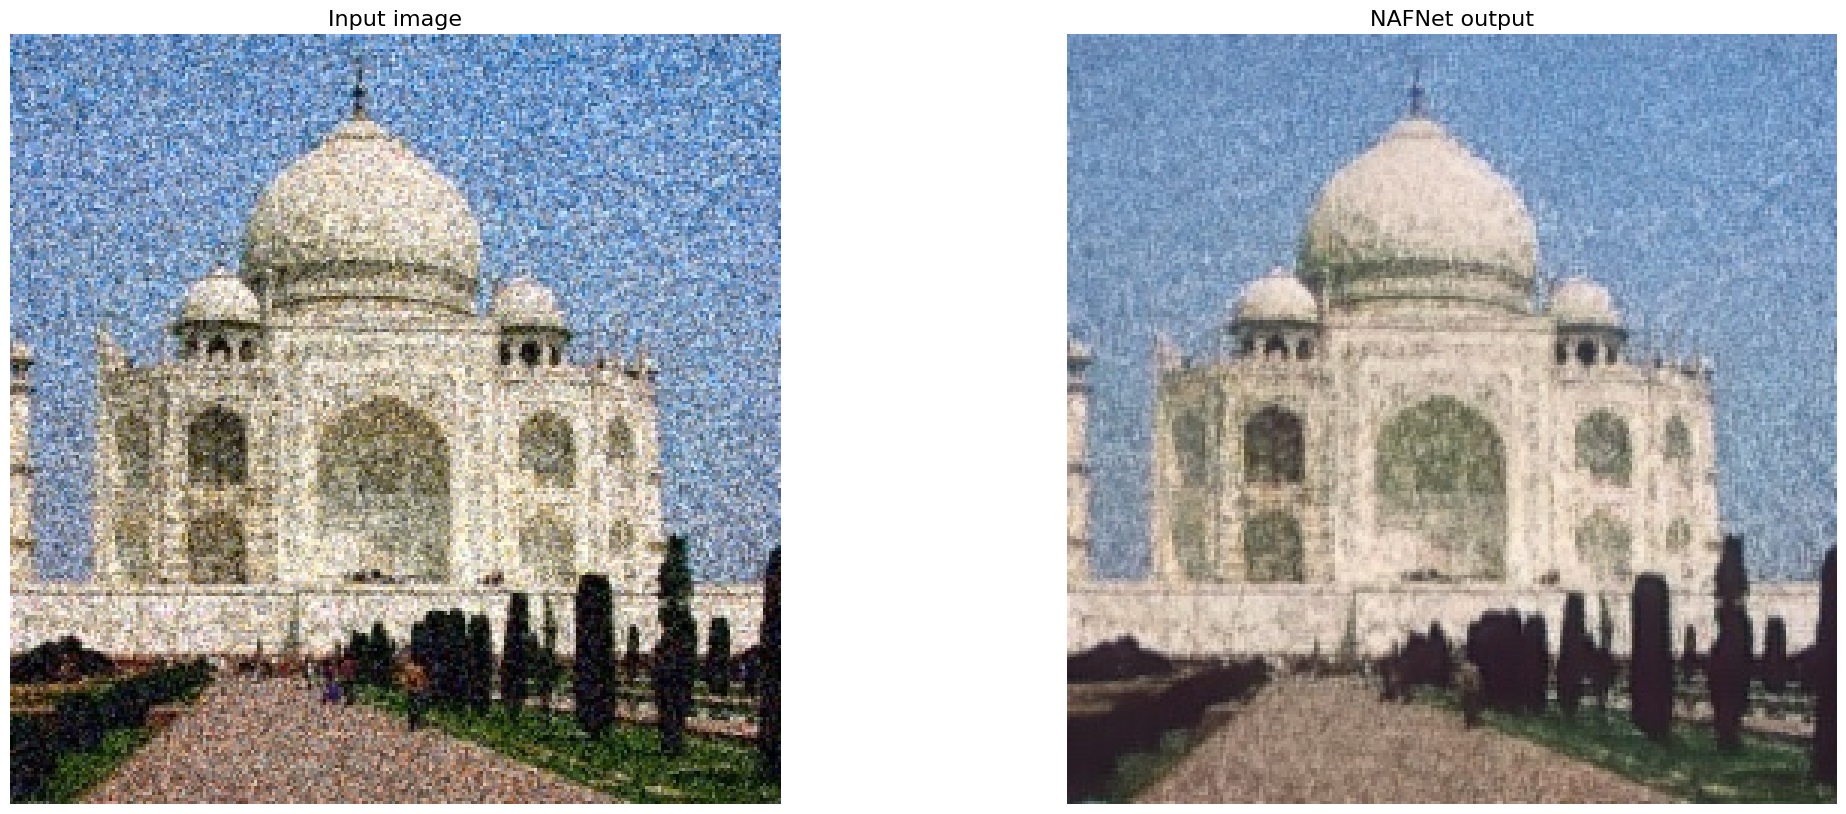

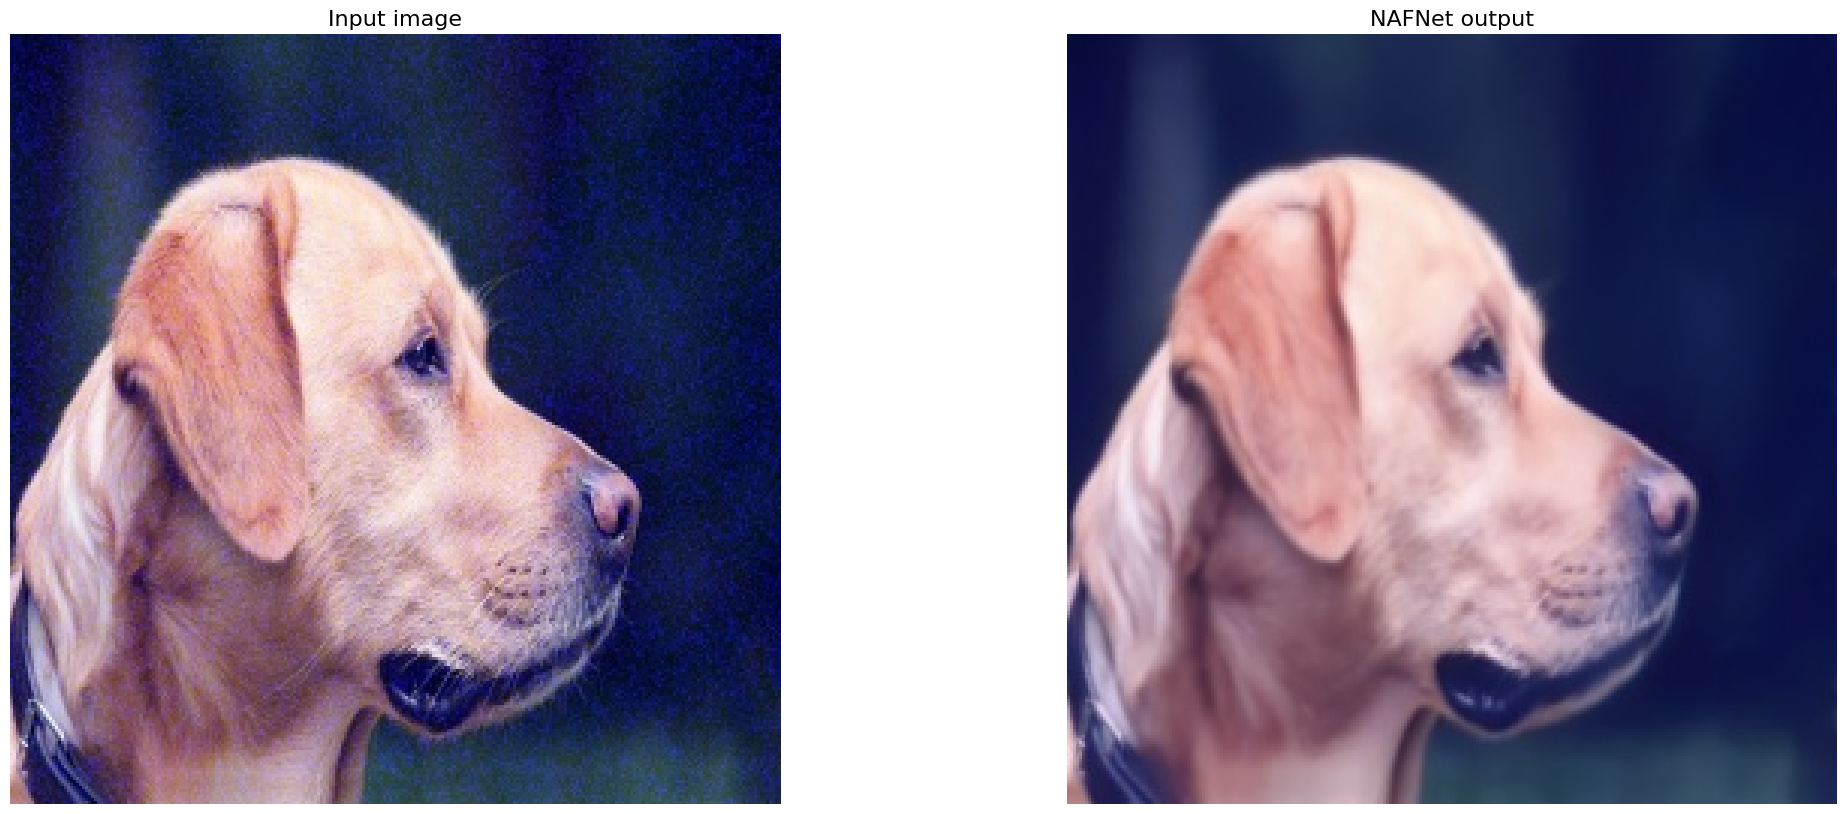

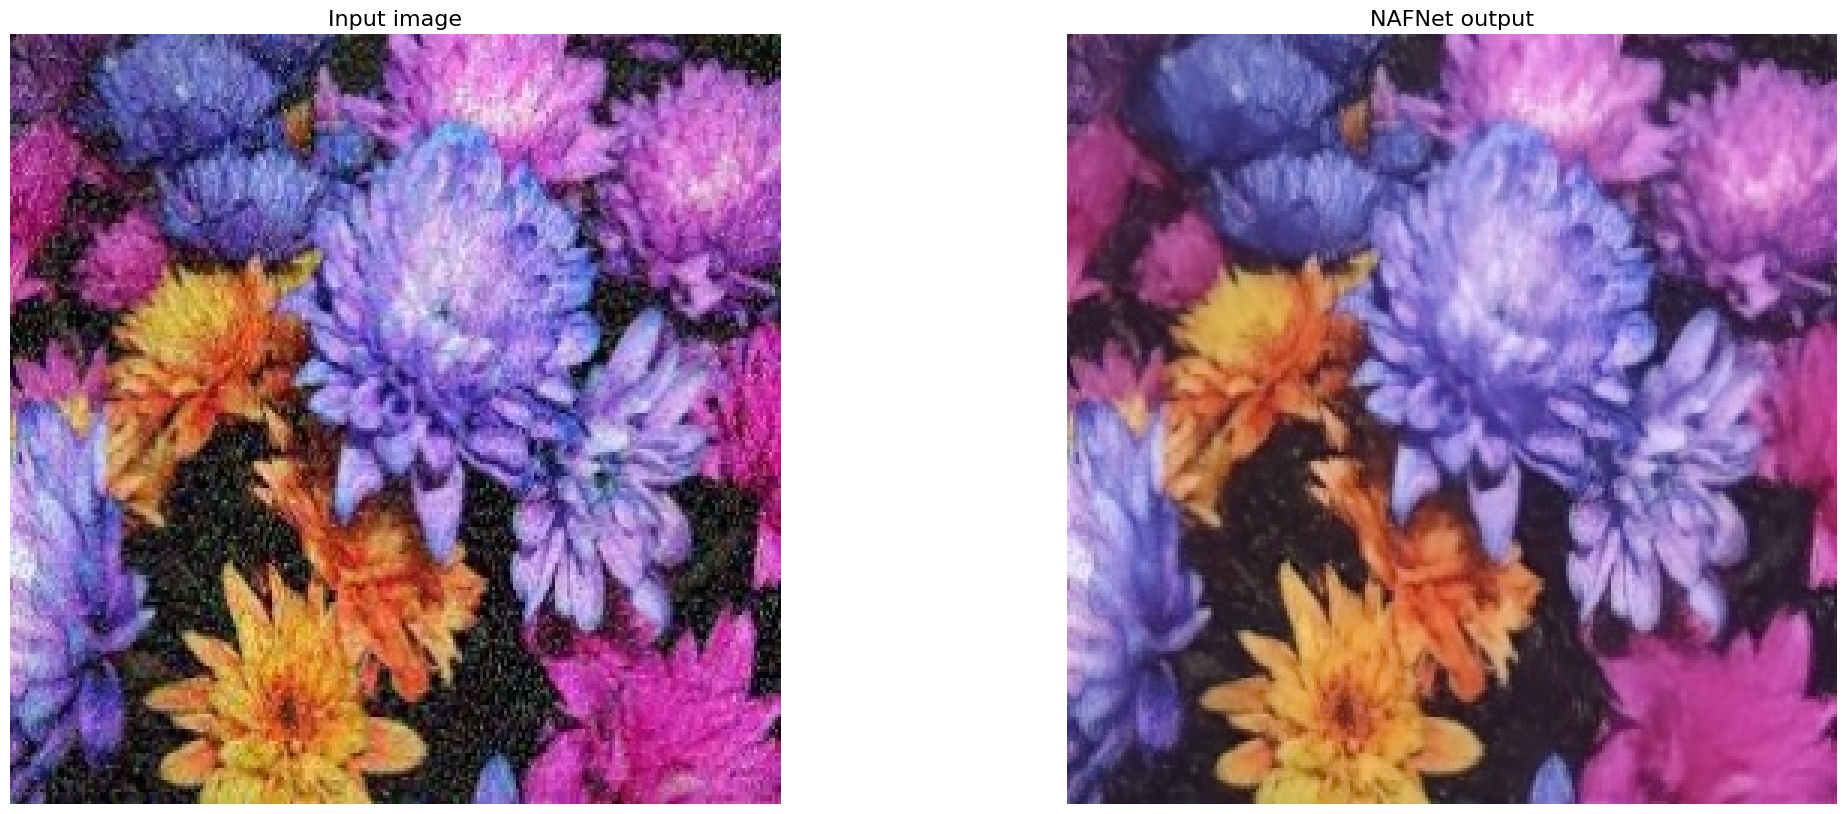

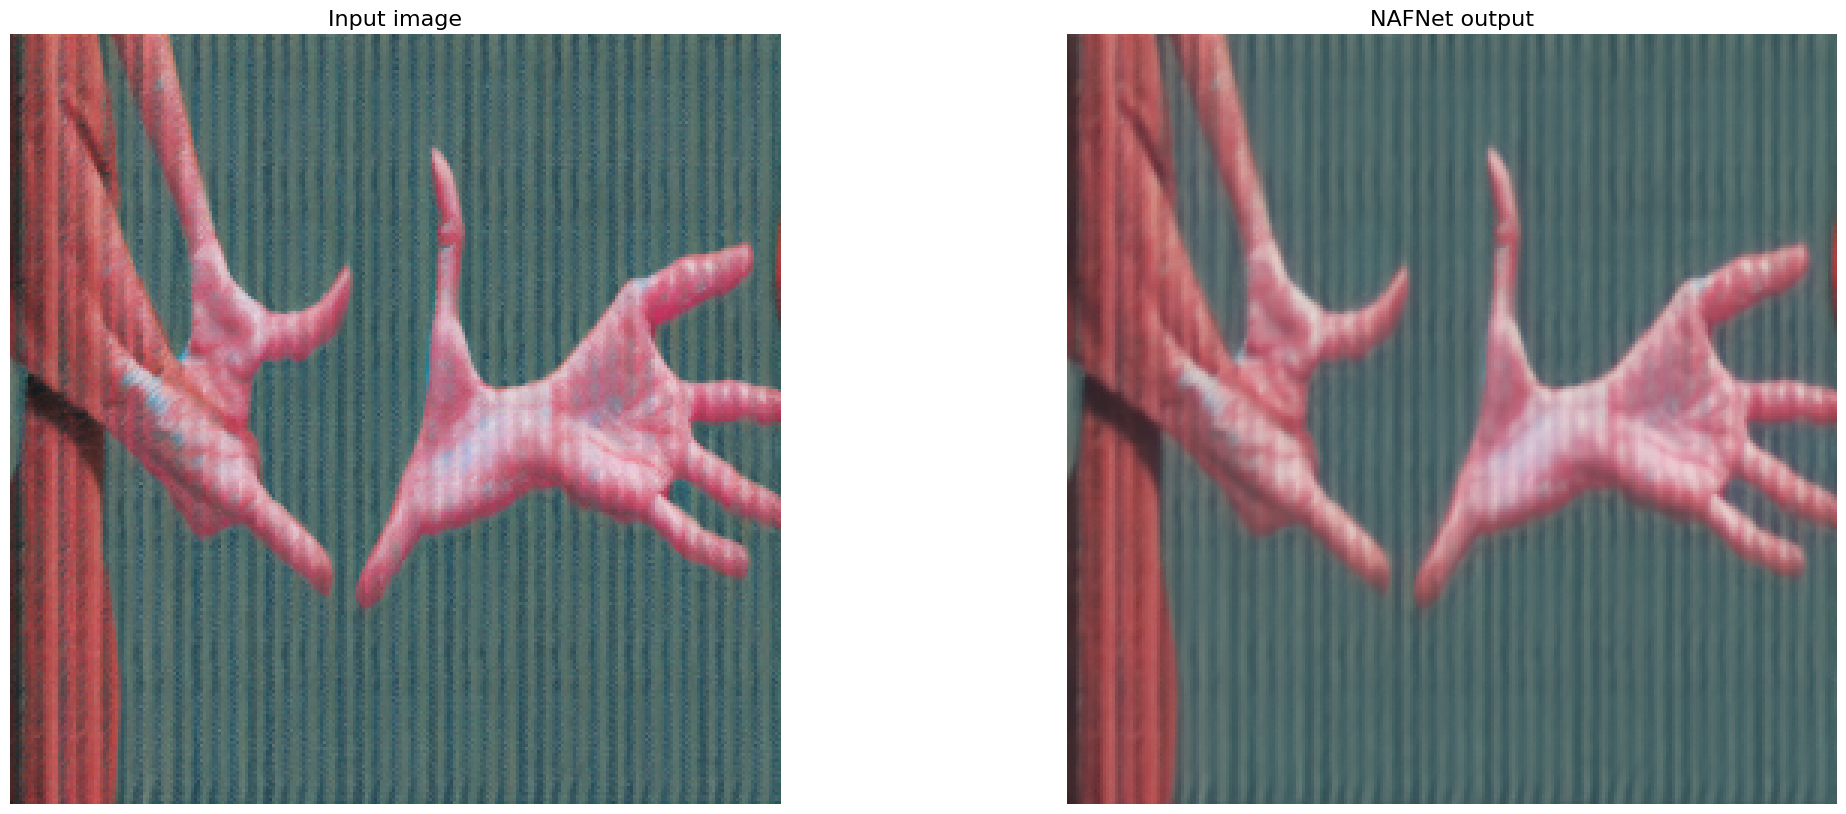

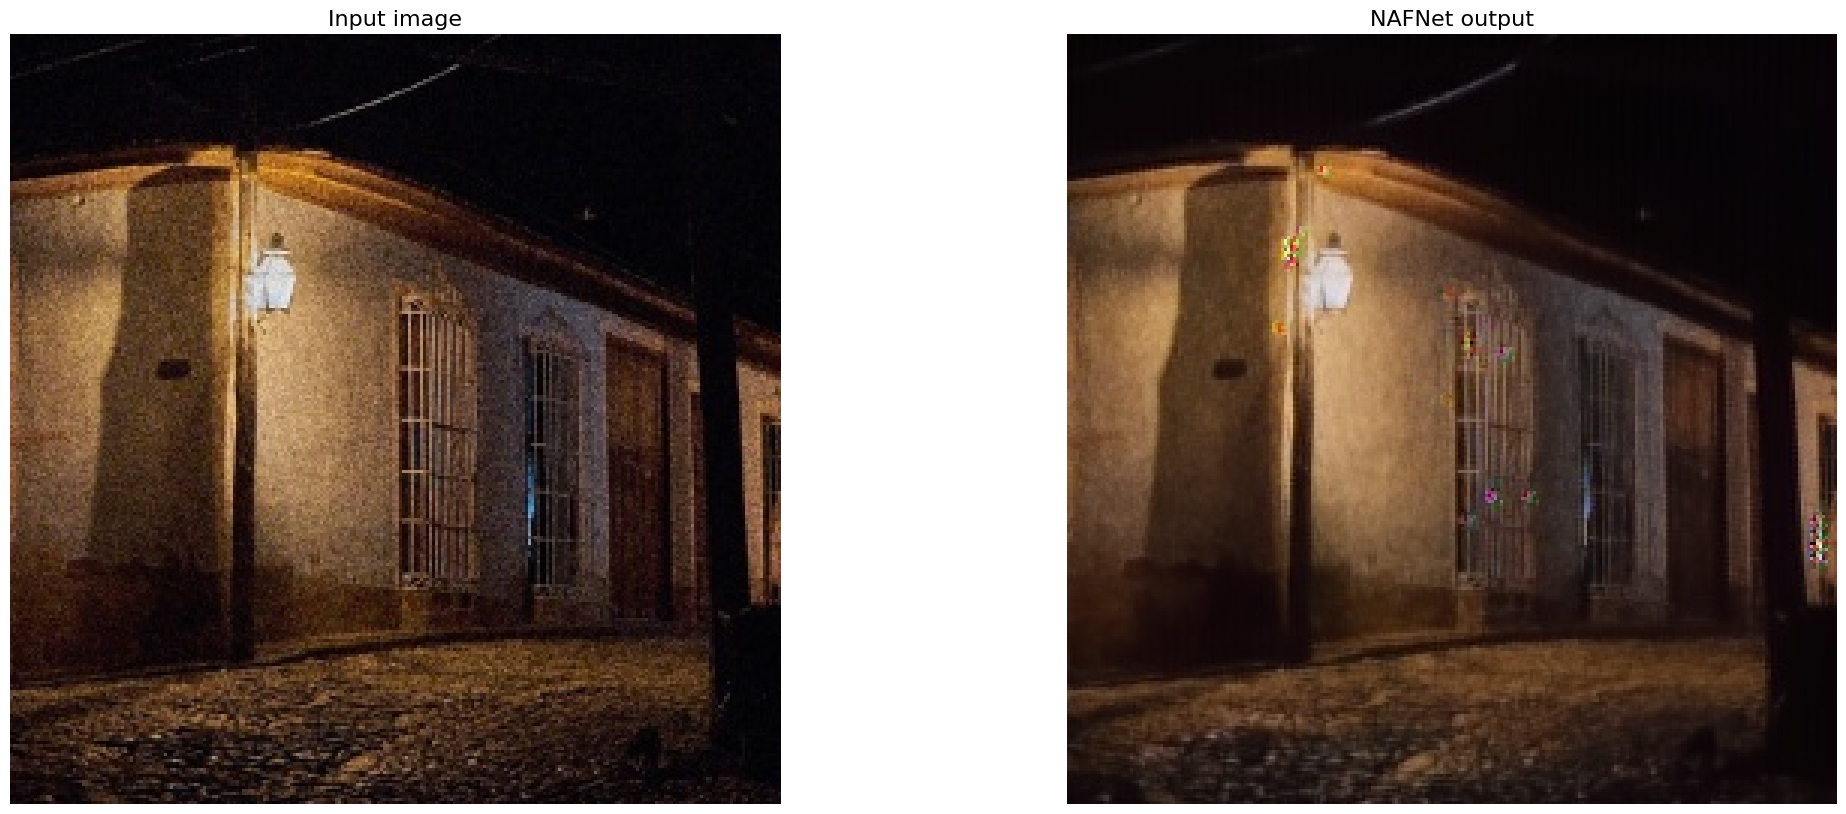

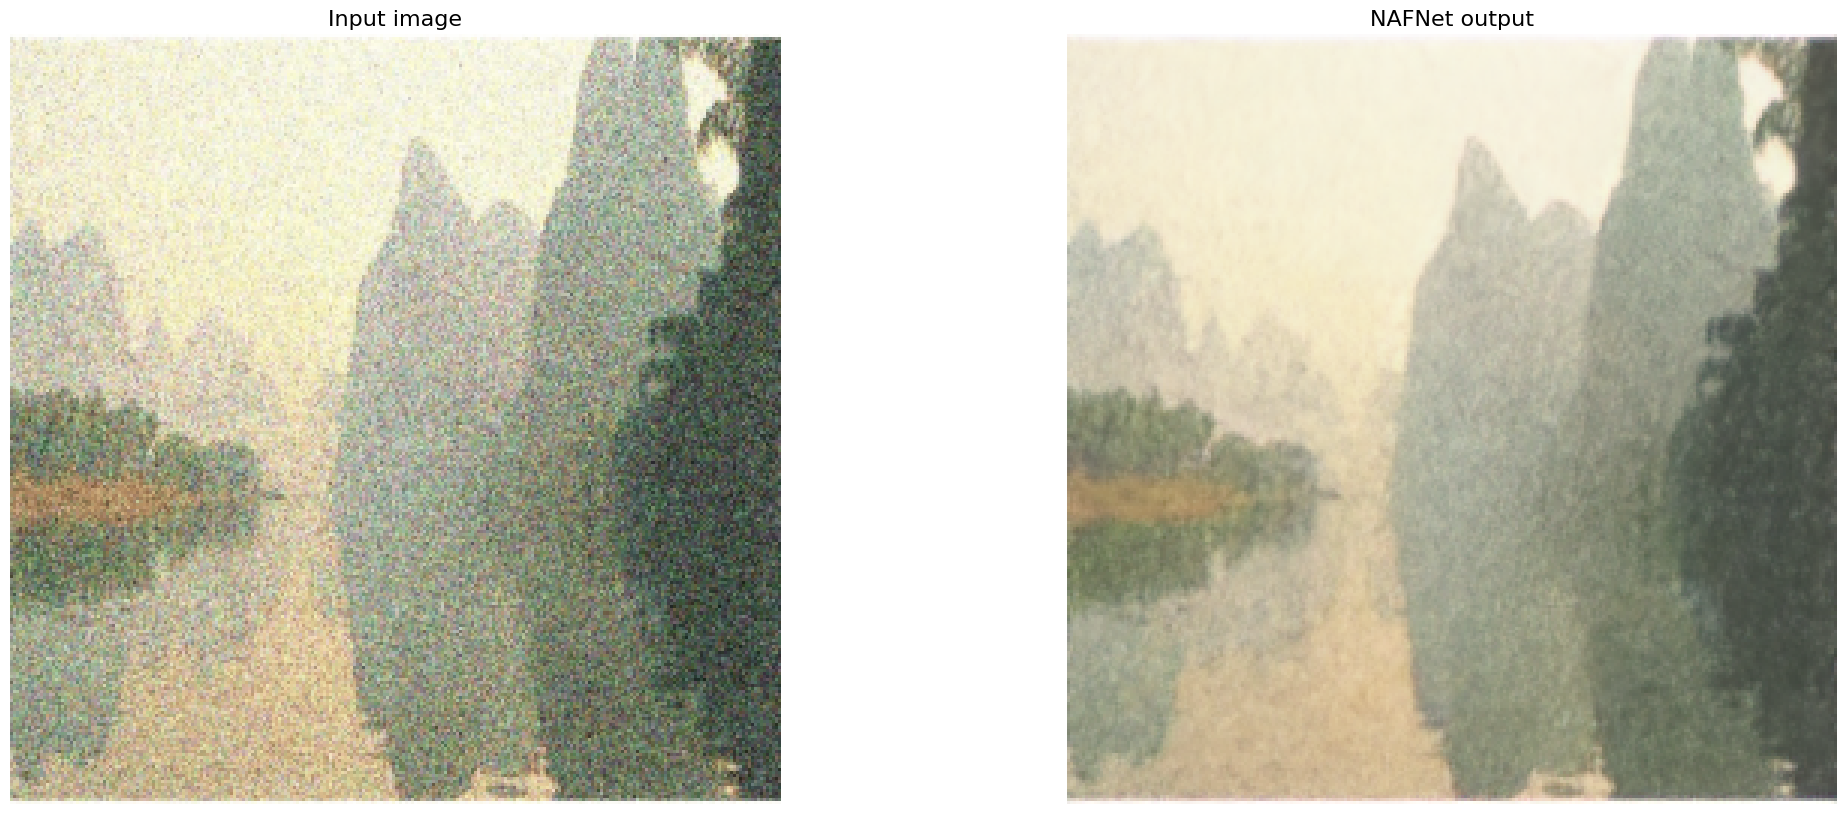

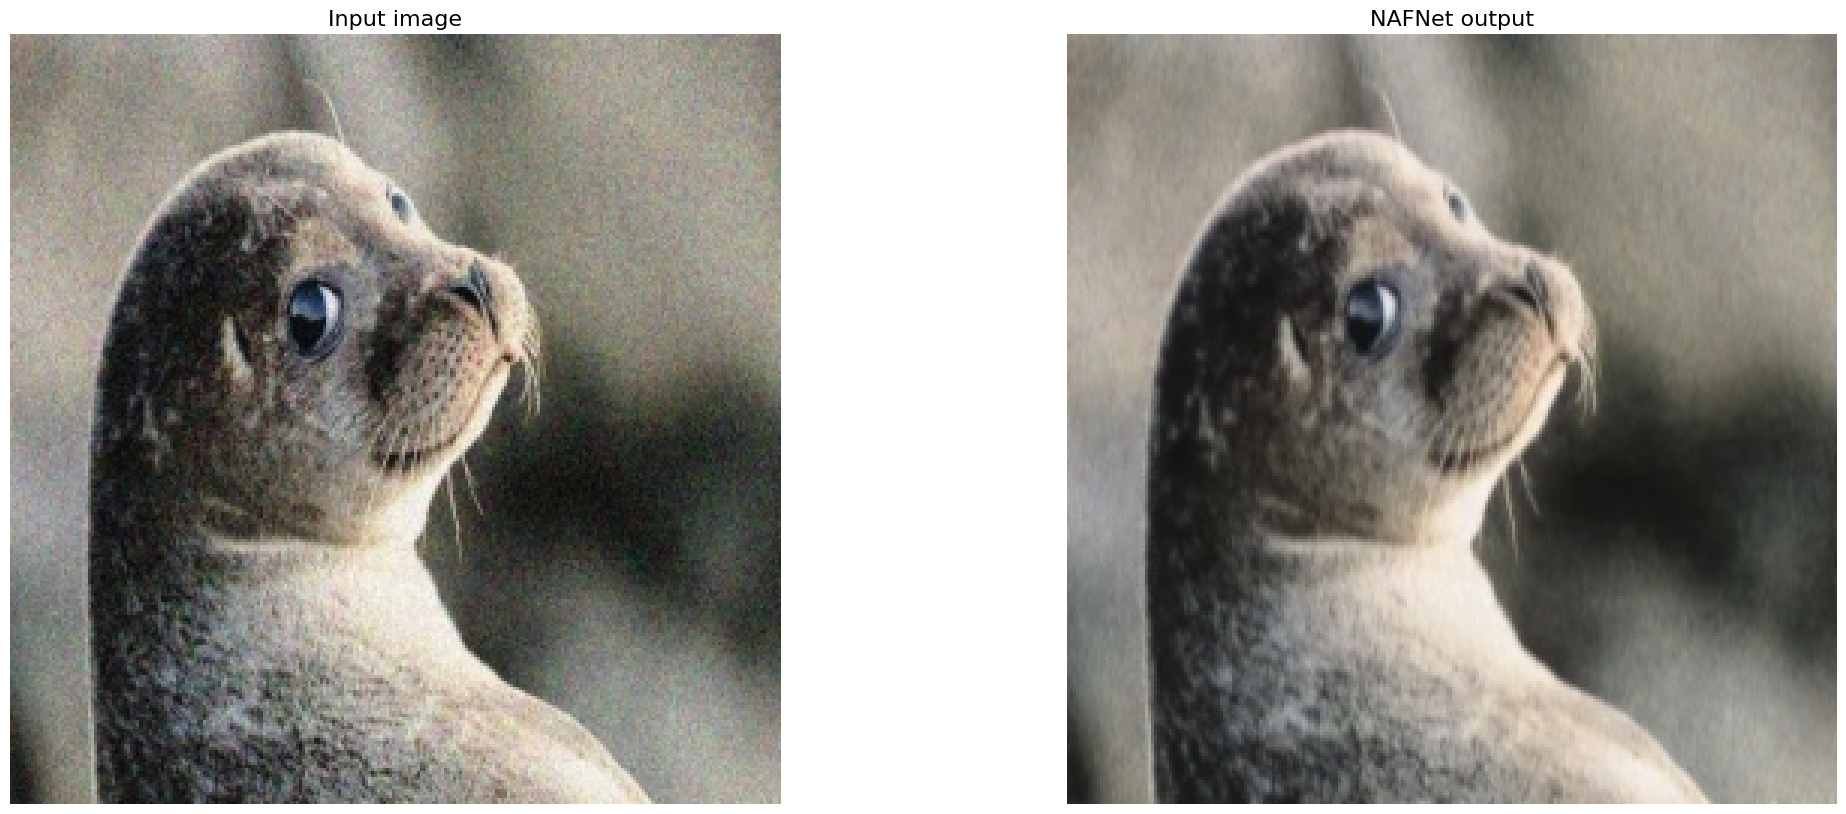

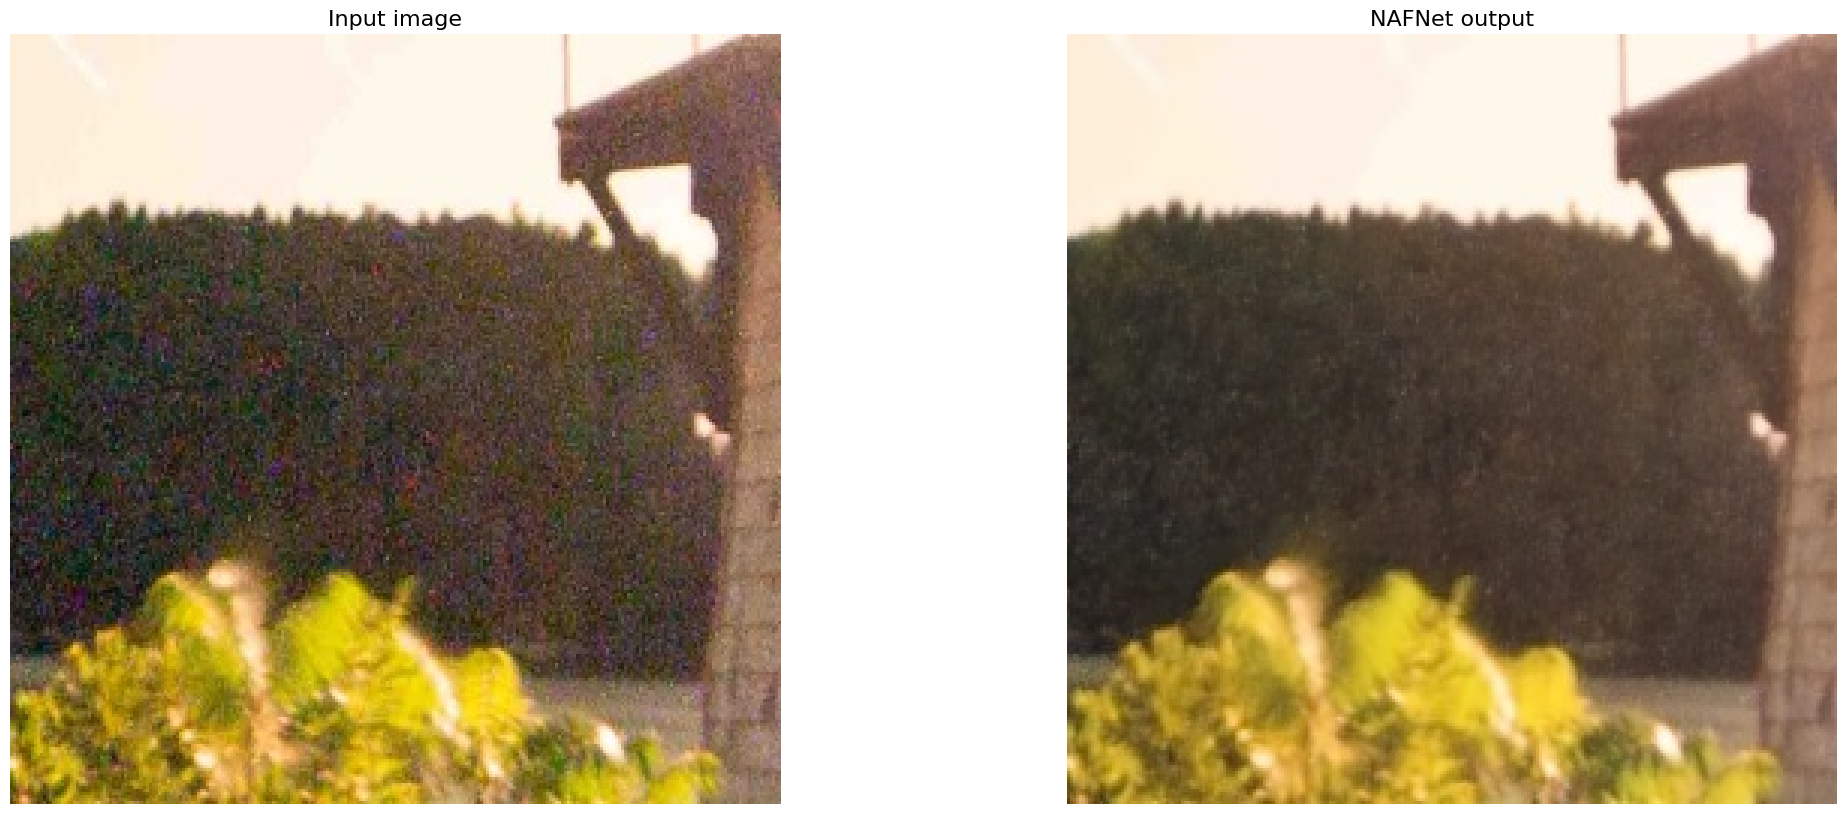

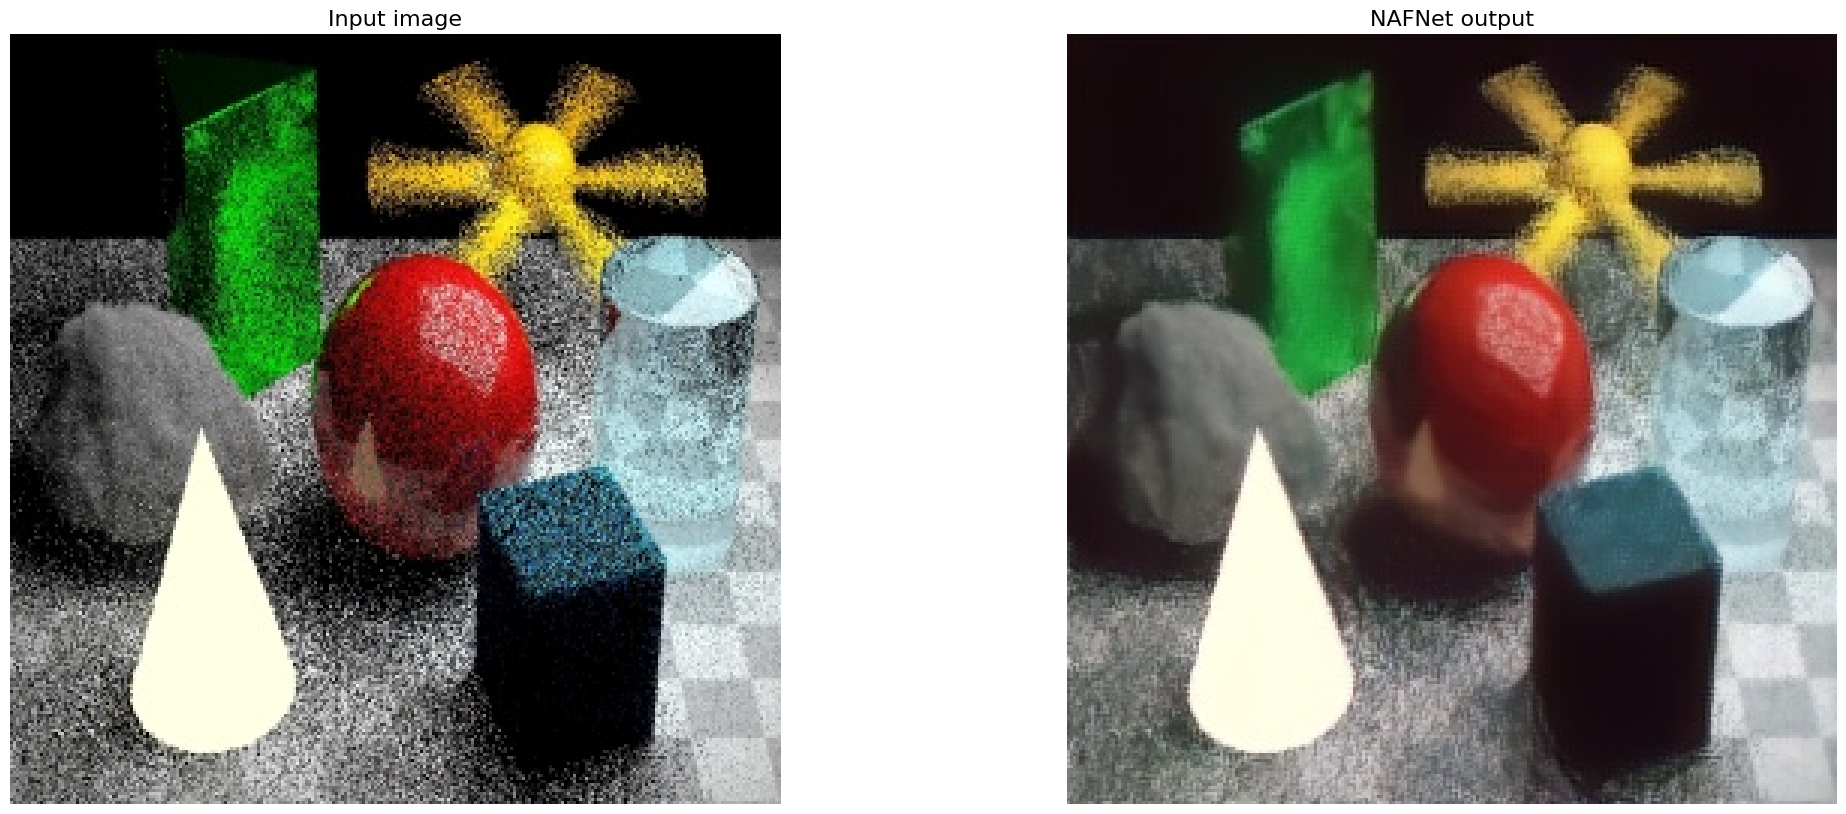

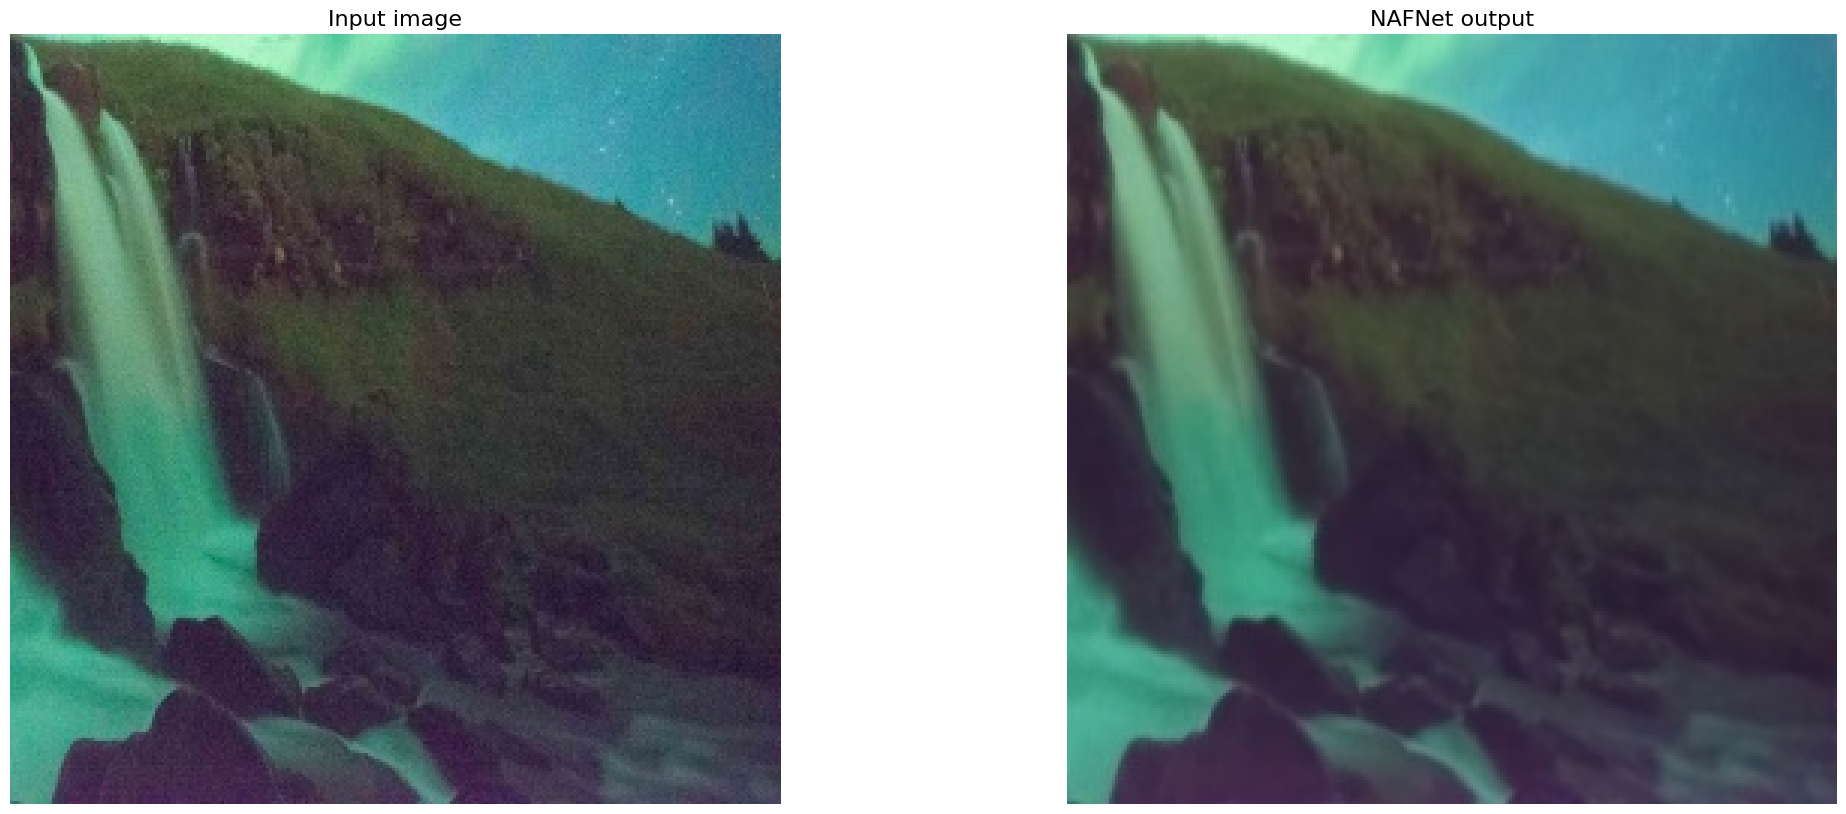

In [15]:
input_folder = '../original_images'
output_folder = '../output_images'

for file in os.listdir(input_folder) :
    input_path = os.path.join(input_folder, file)
    output_path = os.path.join(output_folder,file)
    img_input = imread(input_path)
    inp = img2tensor(img_input)
    single_image_inference(NAFNet, inp, output_path)
    img_output = imread(output_path)
    display(img_input, img_output)

# Try it on uploaded images (not used)

## 1. Upload images

In [ ]:
import os
from google.colab import files
import shutil

upload_folder = 'upload/input'
result_folder = 'upload/output'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.makedirs(upload_folder)
os.makedirs(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

## Inference

In [ ]:
import glob
input_list = sorted(glob.glob(os.path.join(upload_folder, '*')))
for input_path in input_list:
  img_input = imread(input_path)
  inp = img2tensor(img_input)
  output_path = os.path.join(result_folder, os.path.basename(input_path))
  single_image_inference(NAFNet, inp, output_path)

## 3. Visualize (Optional)

In [ ]:
# visualize
input_list = sorted(glob.glob(os.path.join(upload_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

## 4. Download results

In [ ]:
# download the result
print(f'Download {result_folder}')
os.system(f'zip -r -j download.zip {result_folder}/*')
files.download("download.zip")